<a href="https://colab.research.google.com/github/rajdipj/ML/blob/main/Bitcoin_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

In [ ]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [ ]:
df.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.857377e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.471301e+09,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.428019e+07,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.398179e+09,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,1.471428e+09,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,1.544288e+09,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,1.617149e+09,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


In [ ]:
df.isna().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [ ]:

df.interpolate(method='linear', inplace=True)

In [ ]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.39
1,1325317980,4.39,4.39,4.39,4.39,0.555046,2.436653,4.39
2,1325318040,4.39,4.39,4.39,4.39,0.654511,2.873305,4.39
3,1325318100,4.39,4.39,4.39,4.39,0.753977,3.309958,4.39
4,1325318160,4.39,4.39,4.39,4.39,0.853442,3.746611,4.39


In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

In [ ]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.39
1,2011-12-31 07:53:00,4.39,4.39,4.39,4.39,0.555046,2.436653,4.39
2,2011-12-31 07:54:00,4.39,4.39,4.39,4.39,0.654511,2.873305,4.39
3,2011-12-31 07:55:00,4.39,4.39,4.39,4.39,0.753977,3.309958,4.39
4,2011-12-31 07:56:00,4.39,4.39,4.39,4.39,0.853442,3.746611,4.39


In [ ]:
df.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4857372,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
4857376,2021-03-31 00:00:00,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


In [ ]:
df.set_index('Timestamp', inplace=True)  # Set 'Timestamp' as the index
df_resampled_weekly = df.resample('W').mean()  # Resample to weekly frequency using mean


In [ ]:
df_resampled_weekly.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2012-01-01,4.649336,4.650353,4.649336,4.650353,11.272780,51.673641,4.649719
2012-01-08,5.938663,5.948863,5.938651,5.948851,6.837477,37.261783,5.942655
2012-01-15,6.763291,6.764704,6.753707,6.755134,3.011501,20.912794,6.758309
2012-01-22,6.535994,6.537661,6.535481,6.537147,6.379923,40.532655,6.536304
2012-01-29,5.977846,5.977902,5.977837,5.977893,4.369383,27.128929,5.977894


In [ ]:
df_resampled_weekly.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2021-03-07,48914.128959,48949.301482,48879.085381,48915.308925,3.516047,172069.532900,48912.519903
2021-03-14,56072.596878,56109.246463,56036.069102,56073.660223,3.781013,212443.262033,56071.690912
2021-03-21,57410.502874,57448.205265,57372.570491,57411.850219,3.607211,205666.170185,57408.168237
2021-03-28,54717.253108,54752.888213,54682.522158,54718.671592,3.448124,187402.447134,54716.033255
2021-04-04,57629.481342,57657.185226,57602.782523,57630.655356,3.042054,175622.455747,57628.588862


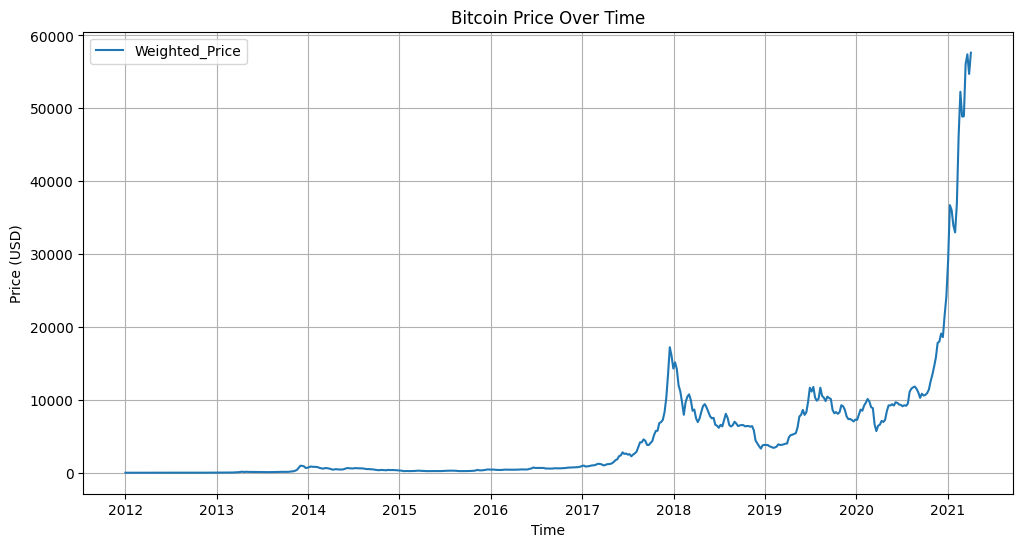

In [ ]:
# Time series plot for Bitcoin's Weighted_Price
plt.figure(figsize=(12, 6))
plt.plot(df_resampled_weekly.index, df_resampled_weekly['Weighted_Price'], label='Weighted_Price')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

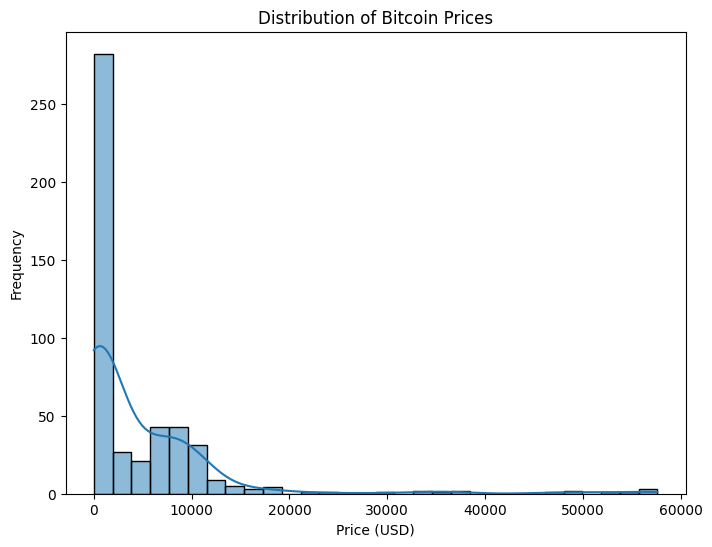

In [ ]:
# Distribution of Bitcoin prices
plt.figure(figsize=(8, 6))
sns.histplot(df_resampled_weekly['Weighted_Price'], bins=30, kde=True)
plt.title('Distribution of Bitcoin Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

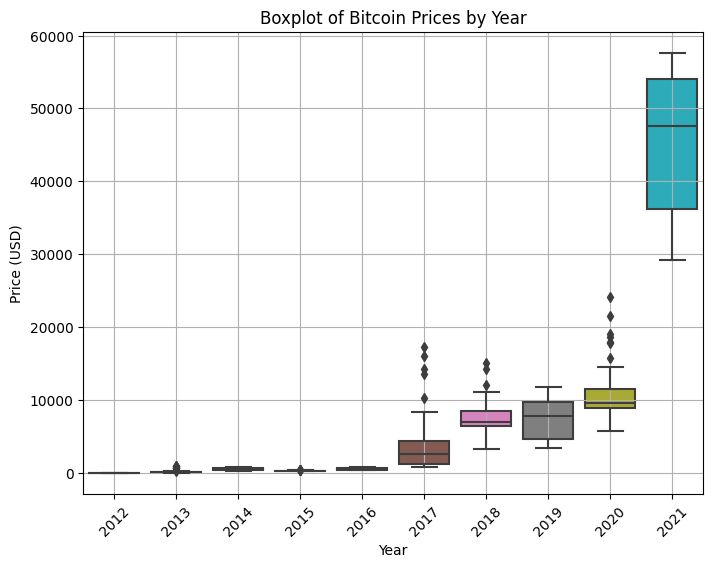

In [ ]:
# Boxplot to visualize potential outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_resampled_weekly.index.year, y='Weighted_Price', data=df_resampled_weekly)
plt.title('Boxplot of Bitcoin Prices by Year')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()





In [ ]:
# Perform ADF test on Bitcoin price data
result = adfuller(df_resampled_weekly['Weighted_Price'])

# Extract and print the test results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Interpret the results
if p_value <= 0.05:
    print("The time series is likely stationary (p-value <= 0.05)")
else:
    print("The time series is likely non-stationary (p-value > 0.05)")

ADF Statistic: 2.4531798499137683
p-value: 0.9990331785058536
Critical Values:
   1%: -3.444250937448703
   5%: -2.867669873870454
   10%: -2.5700349866579657
The time series is likely non-stationary (p-value > 0.05)


In [ ]:
df_stationary = df_resampled_weekly['Weighted_Price'].diff().dropna()

In [ ]:
result_stationary = adfuller(df_stationary)

adf_statistic_stationary = result_stationary[0]
p_value_stationary = result_stationary[1]

print(f'ADF Statistic (Stationary): {adf_statistic_stationary}')
print(f'p-value (Stationary): {p_value_stationary}')

if p_value_stationary <= 0.05:
    print("The differenced time series is likely stationary (p-value <= 0.05)")
else:
    print("The differenced time series is likely non-stationary (p-value > 0.05)")


ADF Statistic (Stationary): -1.2575473914278248
p-value (Stationary): 0.6483638821105175
The differenced time series is likely non-stationary (p-value > 0.05)


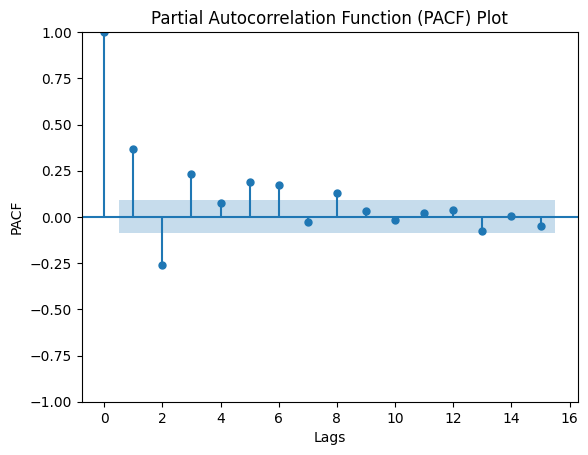

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

# Create a PACF plot for the differenced time series
plot_pacf(df_stationary, lags=15)  # You can adjust the number of lags as needed
plt.title('Partial Autocorrelation Function (PACF) Plot')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.show()

In [ ]:
# Assuming df_resampled_weekly is your original resampled weekly data
# And df_stationary is your first-order differenced data

# Perform seasonal differencing (e.g., weekly seasonality)
seasonal_difference = df_resampled_weekly['Weighted_Price'].diff(52)  # 52 weeks in a year for weekly data

# Drop NaN values resulting from differencing
seasonal_difference = seasonal_difference.dropna()

# Perform the ADF test on the seasonally differenced data
result_seasonal_difference = adfuller(seasonal_difference)

adf_statistic_seasonal = result_seasonal_difference[0]
p_value_seasonal = result_seasonal_difference[1]

print(f'ADF Statistic (Seasonal): {adf_statistic_seasonal}')
print(f'p-value (Seasonal): {p_value_seasonal}')

if p_value_seasonal <= 0.05:
    print("The seasonally differenced time series is likely stationary (p-value <= 0.05)")
else:
    print("The seasonally differenced time series is likely non-stationary (p-value > 0.05)")


ADF Statistic (Seasonal): -0.07963462113120094
p-value (Seasonal): 0.9514296021060475
The seasonally differenced time series is likely non-stationary (p-value > 0.05)


In [ ]:
from statsmodels.tsa.seasonal import STL

# Perform STL decomposition
stl = STL(df_resampled_weekly['Weighted_Price'], seasonal=13)  # Adjust seasonal parameter as needed
result = stl.fit()

# Get the deseasonalized component
deseasonalized_data = result.trend + result.resid


In [ ]:
# Perform the ADF test on the deseasonalized data
result_deseasonalized = adfuller(deseasonalized_data)

adf_statistic_deseasonalized = result_deseasonalized[0]
p_value_deseasonalized = result_deseasonalized[1]

print(f'ADF Statistic (Deseasonalized): {adf_statistic_deseasonalized}')
print(f'p-value (Deseasonalized): {p_value_deseasonalized}')

if p_value_deseasonalized <= 0.05:
    print("The deseasonalized time series is likely stationary (p-value <= 0.05)")
else:
    print("The deseasonalized time series is likely non-stationary (p-value > 0.05)")

ADF Statistic (Deseasonalized): 2.1966216264683527
p-value (Deseasonalized): 0.9988797137652343
The deseasonalized time series is likely non-stationary (p-value > 0.05)


In [ ]:
deseasonalized_data_diff = deseasonalized_data.diff().dropna()


In [ ]:
result_deseasonalized_diff = adfuller(deseasonalized_data_diff)
print(result_deseasonalized_diff)

(-2.88553301659692, 0.04705636024882767, 11, 471, {'1%': -3.444310291143469, '5%': -2.867695986993458, '10%': -2.5700489042602586}, 7562.184153756911)


In [ ]:
p_value_deseasonalized = result_deseasonalized_diff[1]

print(f'ADF Statistic (Deseasonalized): {adf_statistic_deseasonalized}')
print(f'p-value (Deseasonalized): {p_value_deseasonalized}')

if p_value_deseasonalized <= 0.05:
    print("The deseasonalized time series is likely stationary (p-value <= 0.05)")
else:
    print("The deseasonalized time series is likely non-stationary (p-value > 0.05)")

ADF Statistic (Deseasonalized): 2.1966216264683527
p-value (Deseasonalized): 0.04705636024882767
The deseasonalized time series is likely stationary (p-value <= 0.05)


Now, as the time series is stationary, I will apply SARIMAX model on it. but first I have to figure out best seasonal order for (p, d, q) and (P, D, Q, s).

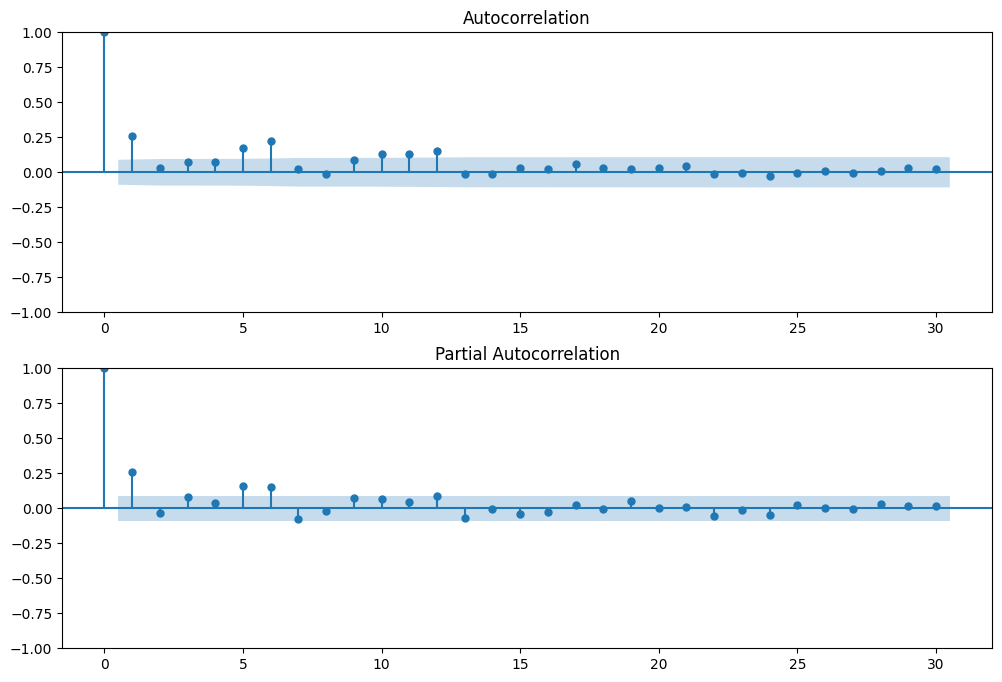

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(deseasonalized_data_diff, lags=30, ax=ax1)
plot_pacf(deseasonalized_data_diff, lags=30, ax=ax2)
plt.show()

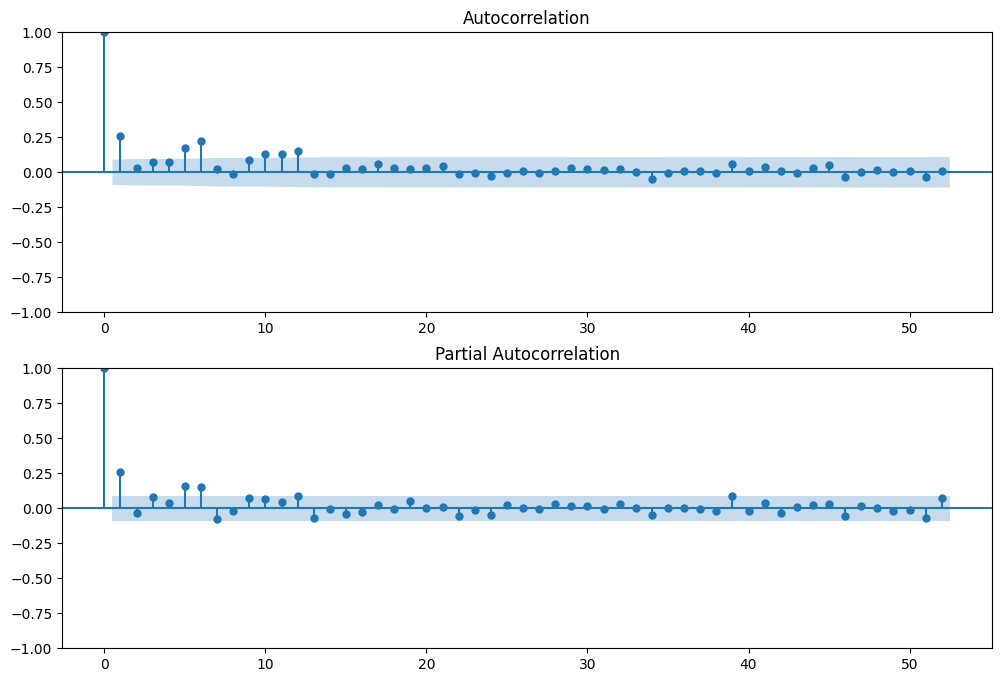

In [ ]:
# Seasonal ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(deseasonalized_data_diff, lags=52, ax=ax1)
plot_pacf(deseasonalized_data_diff, lags=52, ax=ax2)
plt.show()


In [ ]:
# Split the data into training and test sets (adjust the split point as needed)
train_size = int(len(deseasonalized_data) * 0.8)
train_data = deseasonalized_data.iloc[:train_size]
test_data = deseasonalized_data.iloc[train_size:]

Timestamp
2012-01-01    481.680676
2012-01-08    370.013256
2012-01-15    436.060658
2012-01-22    466.076345
2012-01-29    308.713060
Freq: W-SUN, dtype: float64

In [ ]:
# Define ranges for hyperparameters
p_values = range(0, 2)
d_values = range(0, 2)
q_values = range(0, 2)
P_values = range(0, 2)
D_values = range(0, 2)
Q_values = range(0, 2)
s_values = [52]  # Assuming weekly seasonality

best_aic = float("inf")
best_order = None
best_seasonal_order = None

# Iterate through combinations and find the best model using test_data
for order in itertools.product(p_values, d_values, q_values):
    for seasonal_order in itertools.product(P_values, D_values, Q_values, s_values):
        try:
            model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
            results = model.fit()
            aic = results.aic
            if aic < best_aic:
                best_aic = aic
                best_order = order
                best_seasonal_order = seasonal_order
        except:
            continue

print(f"Best AIC: {best_aic}")
print(f"Best Order (p, d, q): {best_order}")
print(f"Best Seasonal Order (P, D, Q, s): {best_seasonal_order}")




/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/states

In [ ]:
from sklearn.metrics import mean_squared_error

aic_scores = []

# Define the best hyperparameters
p, d, q = (1, 0, 0)
P, D, Q, s = (1, 1, 0, 52)  # Best seasonal hyperparameters

# Combine the training and test datasets
combined_data = pd.concat([train_data, test_data])

# Build and train the SARIMA model on the combined dataset
model = SARIMAX(combined_data, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

# Extract the AIC score and append it to the list
aic_score = results.aic
aic_scores.append(aic_score)

# Make predictions on the test dataset
forecast_steps = len(test_data)
forecast = results.get_forecast(steps=forecast_steps)

# Extract the forecasted values and confidence intervals
forecasted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Calculate the Mean Squared Error (MSE) as a measure of accuracy
mse = mean_squared_error(test_data, forecasted_values)

print(f"Mean Squared Error (MSE): {mse}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Mean Squared Error (MSE): 3404171678.370962


In [ ]:
from sklearn.model_selection import train_test_split

# Define your target variable
target_variable = df_resampled_weekly['Weighted_Price']

# Split the data chronologically (e.g., 80% for training, 20% for testing)
train_size = int(0.8 * len(target_variable))
train_target = target_variable[:train_size]
test_target = target_variable[train_size:]

# Create corresponding features (predictor variables) if needed
# You can use lagged values, additional features, etc.

# Assuming you have a DataFrame 'X' with features
train_features = df_resampled_weekly.iloc[:train_size, :]
test_features = df_resampled_weekly.iloc[train_size:, :]



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize the Random Forest model with desired hyperparameters
n_estimators = 100
rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

# Train the Random Forest model on the training data
rf_model.fit(train_features, train_target)

# Make predictions on the test data
rf_predictions = rf_model.predict(test_features)

# Calculate regression metrics (e.g., MSE and MAE)
mse = mean_squared_error(test_target, rf_predictions)
mae = mean_absolute_error(test_target, rf_predictions)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")


Mean Squared Error (MSE): 131400586.64580327
Mean Absolute Error (MAE): 4370.929721577239


In [ ]:
rf_mse = mean_squared_error(test_target, rf_predictions)  # Assuming you have this
n = len(test_target)  # Number of data points in the test set
k = len(rf_model.feature_importances_)  # Number of model parameters

# Calculate the AIC score for Random Forest (customize as needed)
rf_aic = n * np.log(rf_mse) + 2 * k

# Append the AIC score of Random Forest model to the list
aic_scores.append(("Random Forest", rf_aic))

# Now, aic_scores list contains both SARIMA and Random Forest AIC scores
# You can use it for comparison or further analysis
print(aic_scores)

[7228.159615758383, ('Random Forest', 1827.2948294727207)]


As we can see RF model AIC socre is much lower than SARIMA model, hence RF worked best on this data. AIC is an error parameter, hence lower is better.